In [1]:
import geopandas as gpd

africa_rivers = gpd.read_file("../../Nature/rivers/data/rivers/africa/afrivs.shp")

print(africa_rivers)


           cat     AREA  UP_CELLS  DISCHARGE  WIDTH  WIDTH5  WIDTH95  DEPTH  \
0            1    24.56       142       0.55   5.32    1.94    14.74   0.21   
1            2    34.98       199       0.79   6.38    2.32    17.81   0.25   
2            3    97.00       566       2.25  10.80    3.84    30.78   0.37   
3            4    74.98       111       1.72   9.45    3.38    26.81   0.33   
4            5   408.69       106       9.91  22.66    7.82    66.56   0.66   
...        ...      ...       ...        ...    ...     ...      ...    ...   
566428  566429   295.52       379       1.81   9.69    3.46    27.52   0.34   
566429  566430   676.00      1115      12.32  25.28    8.68    74.57   0.72   
566430  566431  1983.77       830      11.60  24.52    8.43    72.24   0.70   
566431  566432   802.29      1335       4.80  15.77    5.52    45.66   0.50   
566432  566433  1400.37       442       1.37   8.43    3.03    23.81   0.31   

        DEPTH5  DEPTH95   ARCID  \
0         0.10  

In [2]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
country_shapefiles = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp")
africa = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'Africa']
africa_lakes = gpd.sjoin(lakes, africa, op='intersects')
africa_lakes = lakes.loc[lakes.index.isin(africa_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(africa_rivers, africa_lakes, op='within')
africa_rivers = africa_rivers.loc[~africa_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


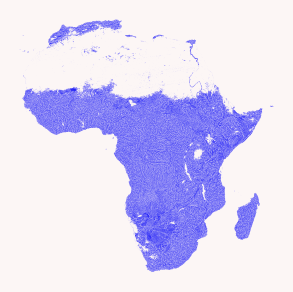

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

africa_rivers.plot(ax=ax, color='blue', lw=0.1)
africa_lakes.plot(ax=ax, color='#FCF6F5FF', alpha=1)

ax.axis('off')

plt.show()

In [7]:
basins = gpd.read_file("../../Nature/rivers/data/basins/africa/hydrobasins_africa.shp")
print(basins)

      SUB_BAS  TO_BAS  MAJ_BAS       SUB_NAME            MAJ_NAME  SUB_AREA  \
0       90002    -888     7009         Borkou           Lake Chad   1179610   
1       30003   30272     7003   White Nile 5                Nile     97222   
2       90008    -888     7009         Dillia           Lake Chad    162385   
3       30029   30297     7003  Lake Victoria                Nile     69200   
4      100030    -888     7010     Lake Rukwa         Rift Valley      3443   
...       ...     ...      ...            ...                 ...       ...   
1445   153931    -999     7015        Comoros          Madasgacar      2257   
1446   153931    -999     7015        Comoros          Madasgacar      2257   
1447   220781    -999     7022        Cross 1      Gulf of Guinea     51730   
1448   210977    -999     7021         Saloum  Africa, West Coast     41540   
1449   210974    -999     7021       Scarcies  Africa, West Coast     29461   

      MAJ_AREA  LEGEND                             

In [8]:
import pandas as pd

colours_i_like = ['#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', '#848482', '#F3C300',  'blue', '#F38400',
                  '#E68FAC', '#604E97', '#F3C300', '#B3446C', '#C2B280',
                  '#F6A600', '#882D17', '#E25822', '#8DB600',
                  '#F99379',  '#DCD300', '#F3C300', '#E68FAC', '#C2B280',
                  '#222222']

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

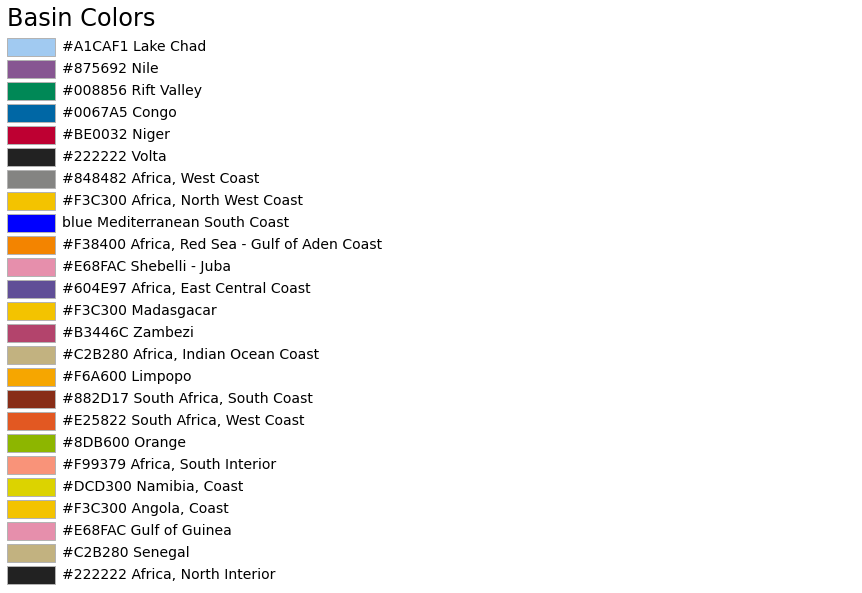

In [9]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colours_i_like)
ncols = 1
nrows = len(colours_i_like)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colours_i_like, basins.MAJ_NAME.unique().tolist())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )
plt.show()

C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


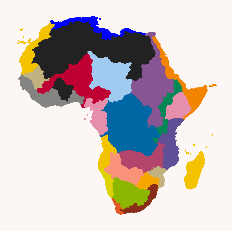

In [10]:
basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='MAJ_NAME', edgecolor='face', color=basins['colors'])
ax.axis('off')
plt.show()

In [11]:


rivers_basins = gpd.sjoin(africa_rivers, basins, op='intersects')



C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


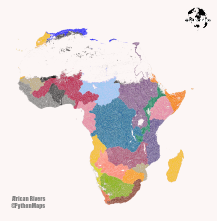

In [12]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=0.1)
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

logo = plt.imread('../../Branding/globe.png')
newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.show()

In [13]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = 0.6 - 0.005
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = 0.005 + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DISCHARGE', min_value=0.005, max_value=0.6)
rivers_basins = scale_lw(rivers_basins, 'WIDTH', min_value=0.005, max_value=0.6)
rivers_basins = scale_lw(rivers_basins, 'DEPTH', min_value=0.005, max_value=0.6)

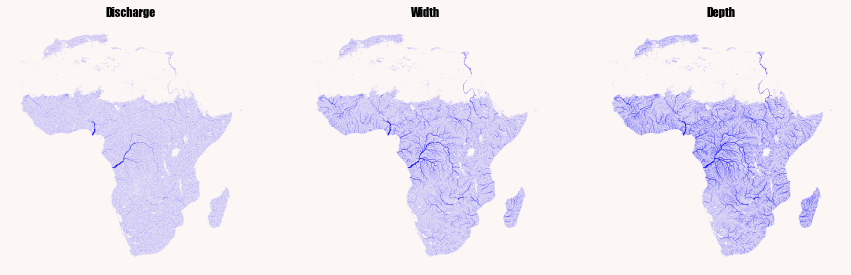

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 7)

ax1 = plt.subplot(1,3,1)
rivers_basins.plot(ax=ax1, color='blue', lw=rivers_basins['LW_DISCHARGE'])
africa_lakes.plot(ax=ax1, color='#FCF6F5FF')
ax1.set_title("Discharge", fontfamily='fantasy')
ax1.axis('off')

ax2 = plt.subplot(1,3,2)
rivers_basins.plot(ax=ax2, color='blue', lw=rivers_basins['LW_WIDTH'])
africa_lakes.plot(ax=ax2, color='#FCF6F5FF')
ax2.set_title("Width", fontfamily='fantasy')
ax2.axis('off')

ax3 = plt.subplot(1,3,3)
rivers_basins.plot(ax=ax3, color='blue', lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax3, color='#FCF6F5FF')
ax3.set_title("Depth", fontfamily='fantasy')
ax3.axis('off')

plt.show()

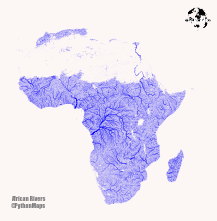

In [15]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color='blue', lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.show()

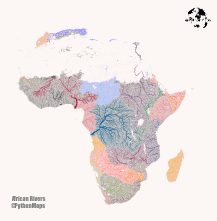

In [18]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.savefig("outputs/client_africa1.png", dpi=200, bbox_inches='tight')

plt.show()

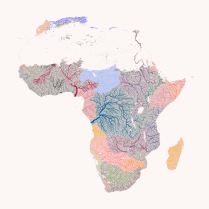

In [19]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

ax.axis('off')
plt.savefig("outputs/client_africa.png", dpi=2000, bbox_inches='tight')

plt.show()